In [4]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

---
# Числовые характеристики, сходимость
---


### Задача.

---

Пусть случайная величина $\xi$ имеет абсолютно непрерывное распределение с плотностью

$$
f_\xi(x) = \begin{cases}
 2x,\quad & x \in [0, 1] \\
 0,\quad & x \notin [0,1]
 \end{cases}
$$

Найти математическое ожидание случайной величины $\eta=2^x$.

---

$$
\mathbb E(2^\xi) = \int\limits_{-\infty}^{+\infty}2^x f_\xi(x) dx = 2 \int\limits_0^1 2^x x dx=\dfrac{4}{\log 2}-\dfrac{2}{\log ^ 2 2}
$$

---

In [6]:
x = sp.Symbol('x')
sp.Integral(2 * x * 2 ** x, (x, 0, 1)).doit().simplify()

2*(-1 + 2*log(2))/log(2)**2

### Задача.

---

Пусть случайная величина $\xi$ имеет абсолютно непрерывное распределение с плотностью

$$
f_\xi(x) = \begin{cases}
 2x,\quad & x \in [0, 1] \\
 0,\quad & x \notin [0,1]
 \end{cases}
$$

Найти медиану случайной величины $\xi$.

---

$$
F_\xi(x) =
  \begin{cases}
 0, & x \leq 0 \\
 x^2, & 0 < x \leq 1\\
 1, & x > 1
 \end{cases}
$$

$$
x^2=\dfrac 1 2\quad\Rightarrow\quad x=\dfrac{\sqrt{2}}{2}
$$

---


In [9]:
x = sp.Symbol('x')
sp.solve(
    sp.Integral(2 * x, x).doit() - 1 / 2,
    x
)

[-0.707106781186548, 0.707106781186548]

### Задача.

---

Пусть $\xi_1\sim\mathsf G_{0.2}$, $\xi_2\sim\mathsf \Pi_2$, $\xi_3\sim \mathsf{Exp}_2$, $\xi_4\sim \mathsf U_{2,4}$, $\xi_5\sim \mathsf N_{2,9}$.

Найти $\mathbb E(3 \xi_1 + \xi_2 - 4 \xi_3 - 2 \xi_4 - \xi_5)$.

---
$$
\mathbb E(3 \xi_1 + \xi_2 - 4 \xi_3 - 2 \xi_4 - \xi_5) = \\
= 3 \mathbb E \xi_1 + 2 \mathbb E \xi_2 - 4 \mathbb E \xi_3 - 2 \mathbb E \xi_4 - \mathbb E \xi_5 =\\
= 3 \cdot \dfrac 1 p + 2 \cdot \lambda - 4\cdot \dfrac 1 \lambda - 2 \cdot \dfrac{b-a}{2}-a=\\
=3\cdot 5 + 2\cdot 2 - 4\cdot 5 - 2\cdot 1 - 2 = 7
$$
---

In [ ]:
x = sp.Symbol('x')

xi_1_exp = sp.Sum(x * 0.2 * 0.8 ** (x - 1), (x, 0, +sp.oo)).doit()
xi_2_exp = sp.Sum(x * 2 ** x * sp.exp(-2) / sp.factorial(x), (x, 0, +sp.oo)).doit()
xi_3_exp = sp.Integral(x * 2 * sp.exp(-2 * x), (x, 0, +sp.oo)).doit()
xi_4_exp = sp.Integral(x * 1 / (4 - 2), (x, 2, 4)).doit()
xi_5_exp = sp.Integral(x * sp.exp(-(x - 2) ** 2 / (2 * 9)) / (3 * sp.sqrt(2 * sp.pi)), (x, -sp.oo, +sp.oo)).doit()

3 * xi_1_exp + xi_2_exp - 4 * xi_3_exp - 2 * xi_4_exp - xi_5_exp

7.00000000000001

### Задача.

---

Пусть случайная величина $\xi$ имеет абсолютно непрерывное распределение с плотностью

$$
f_\xi(x) = \begin{cases}
 2x,\quad & x \in [0, 1] \\
 0,\quad & x \notin [0,1]
 \end{cases}
$$

Найти дисперсию случайной величины $\eta=2^\xi$.

---

$$\mathbb D \eta = \mathbb E \eta^2 - (\mathbb E \eta)^2$$

$$\mathbb E \left(2^{2\xi}\right) = \int\limits_{-\infty}^{+\infty} 2^{2x} f_\xi(x) dx = 2\int\limits_0^1 2^{2x}xdx = \frac{8\ln 2 - 3}{2\ln^2 2}$$

$$\mathbb D \eta = \frac{8\ln 2 - 3}{2\ln^2 2} - \left(\frac{4 \ln 2 - 2}{\ln^2 2} \right)^2$$

---

In [ ]:
x = sp.Symbol('x')

xi_expected = sp.Integral(2 * x * 2 ** x, (x, 0, 1)).doit()
xi_squared_expected = sp.Integral(2 * x * 2 ** (2 * x), (x, 0, 1)).doit()
float(xi_squared_expected - xi_expected ** 2)

0.06292697009891565

### Задача.

---

Пусть $\xi_1\sim\mathsf G_{0.2}$, $\xi_2\sim\mathsf \Pi_2$, $\xi_3\sim \mathsf{Exp}_2$, $\xi_4\sim \mathsf U_{2,4}$, $\xi_5\sim \mathsf N_{2,9}$, и случайные величины независимы.

Найти $\mathbb D(3 \xi_1 + \xi_2 - 4 \xi_3 - 2 \xi_4 - \xi_5)$.

---

In [ ]:
xi_sq_1_exp = sp.Sum(x ** 2 * 0.2 * 0.8 ** (x - 1), (x, 0, +sp.oo)).doit()
xi_sq_2_exp = sp.Sum(x ** 2 * 2 ** x * sp.exp(-2) / sp.factorial(x), (x, 0, +sp.oo)).doit()
xi_sq_3_exp = sp.Integral(x ** 2 * 2 * sp.exp(-2 * x), (x, 0, +sp.oo)).doit()
xi_sq_4_exp = sp.Integral(x ** 2 * 1 / (4 - 2), (x, 2, 4)).doit()
xi_sq_5_exp = sp.Integral(x ** 2 * sp.exp(-(x - 2) ** 2 / (2 * 9)) / (3 * sp.sqrt(2 * sp.pi)), (x, -sp.oo, +sp.oo)).doit()

xi_1_disp = xi_sq_1_exp - xi_1_exp ** 2
xi_2_disp = xi_sq_2_exp - xi_2_exp ** 2
xi_3_disp = xi_sq_3_exp - xi_3_exp ** 2
xi_4_disp = xi_sq_4_exp - xi_4_exp ** 2
xi_5_disp = xi_sq_5_exp - xi_5_exp ** 2

3 * xi_1_disp + xi_2_disp - 4 * xi_3_disp - 2 * xi_4_disp - xi_5_disp

51.3333333333333

---
# Закон больших чисел и центральная предельная теорема
---

### Моделирование закона больших чисел

---

Пусть $\xi_1$, ..., $\xi_n$, ... — последовательность попарно независимых и одинаково распределенных случайных величин, причем существует второй момент $\mathbb E\xi_1^2$. Тогда

$$
\forall \varepsilon > 0\quad \lim\limits_{n\to\infty} \mathbb P\left( \left| \dfrac {S_n}{n} - \mathbb E\xi_1 \right| > \varepsilon \right)=0
$$

---

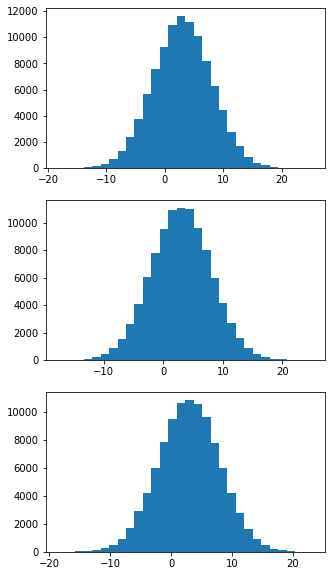

(3.001698329617454, 3)

In [ ]:
a, sigma_2 = 3, 5
t, n = 100000, 100

S_n = np.random.normal(a, sigma_2, (n, t))

fig, axes = plt.subplots(3)
fig.set_size_inches((5, 10))
for i in range(3):
    axes[i].hist(S_n[i], bins=30)
plt.show()

(S_n.sum(axis=1) / t).sum(axis=0) / n, a

### Центральная предельная теорема

---

Пусть $\xi_1$, ..., $\xi_n$, ... — независимые в совокупности, одинаково распределенные случайные величины, у которых существует второй момент, а дисперсия отлична от нуля. Тогда имеет место слабая сходимость

$$
\dfrac{S_n-n\mathbb E \xi_1}{\sqrt{n\mathbb D\xi_1}}\xrightarrow[d]{n\to\infty} \mathsf N_{0, 1}
$$

---

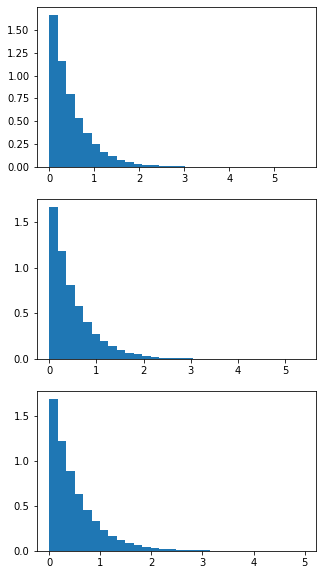

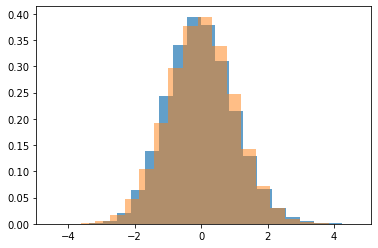

In [ ]:
beta = 2
t, n = 100000, 100

S_n = np.random.exponential(1 / beta, (n, t))

fig, axes = plt.subplots(3)
fig.set_size_inches((5, 10))
for i in range(3):
    axes[i].hist(S_n[i], bins=30, density=True)
plt.show()

res = (S_n.sum(axis=0) - n * (1 / beta)) / np.sqrt(n * (1 / beta ** 2))
plt.hist(res, bins=20, alpha=0.7, density=True)
# plt.show()

plt.hist(np.random.normal(0, 1, t), bins=20, alpha=0.5, density=True)
plt.show()